# Brownian Diffusion and the Equation of Motion

So far we have been playing with generating random Brownian diffusion walks, but let's get formal about it. A Brownian process is described by a vector $X$ with some initial condition:

$$
X(0) = X_0
$$

subject to a stochastic (random) change equation:

$$
X(t + dt) = X(t) + N(0, \delta^2 dt; t, t + dt)
$$

where $N(a,b; t_1, t_20$ is a normal distribution with mean $a$, variance $b$, and $t_1, t_2$ make the time independence of the random values explicit.

This derives from the fact that we are assuming the time scales of random motion are much faster than the time scale of $dt$.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from brownian import brownian

In [14]:
import inspect
src = inspect.getsourcelines(brownian)[0]
print("".join(src))

def brownian(delta, dt, N, d):
    """Returns a d-dimensional Brownian walk 
    with length scale delta
    and random step size drawn from 
    zero-mean normal distribution 
    with standard deviation delta^2*dt.
    
    N steps in d dimensional space.

    Parameters:
        
        delta : length scale of diffusion step
        dt : time scale of diffusion step
        N : number of diffusion steps
        d : dimensionality of Brownian walk
    """
    mean = 0.0
    stdev = np.sqrt(delta*delta*dt)
    
    # Get N-1 random steps
    r = np.random.normal(loc=mean, scale=stdev, size=(N-1,d))
    
    # Make sure the first location is 0,0
    r2 = np.zeros((N, d))
    r2[1:N,:] = r[0:(N-1),:]
    
    return r2.cumsum(axis=0)



In [15]:
# Weiner process parameter
delta = 0.25
# Total time
T = 10.0
# N steps
N = 1000
# Time step size
dt = N/T

bw = brownian(delta, dt, N, 2)

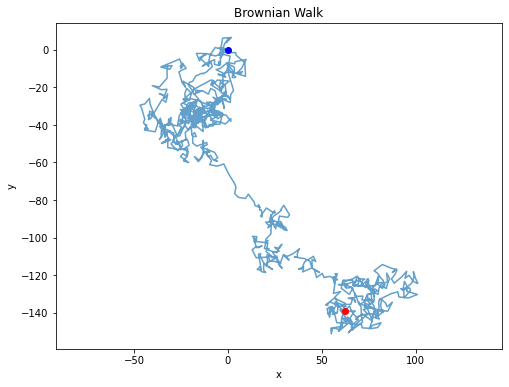

In [16]:
def plot_brownian_walk(bw):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    
    ax.plot(bw[:,0],bw[:,1],'-',alpha=0.7)
    ax.plot(bw[0,0],bw[0,1],'bo')
    ax.plot(bw[-1,0],bw[-1,1],'ro')
    
    ax.set_title("Brownian Walk")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    plt.axis('equal')
    plt.show()

plot_brownian_walk(bw)

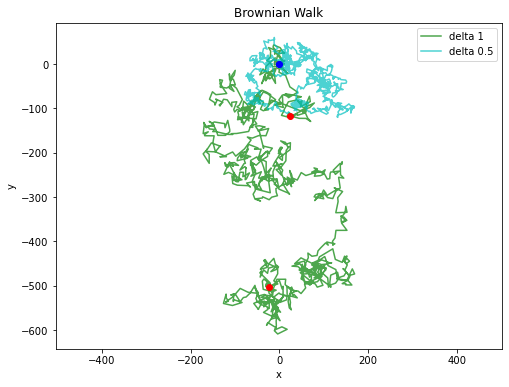

In [17]:
def plot_two_brownian_walks(bw, bw2):
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    
    ax.plot(bw[:,0],bw[:,1],'g-',alpha=0.7,label='delta 1')
    ax.plot(bw[0,0],bw[0,1],'bo')
    ax.plot(bw[-1,0],bw[-1,1],'ro')
    
    ax.plot(bw2[:,0],bw2[:,1],'c-',alpha=0.7,label='delta 0.5')
    ax.plot(bw2[0,0],bw2[0,1],'bo')
    ax.plot(bw2[-1,0],bw2[-1,1],'ro')
    
    ax.set_title("Brownian Walk")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    
    plt.axis('equal')
    plt.show()


# Total time
T = 10.0
# N steps
N = 1000
# Time step size
dt = N/T

bw = brownian(1.0, dt, N, 2)

bw2 = brownian(0.50, dt, N, 2)

plot_two_brownian_walks(bw,bw2)

## Timescales

Three timescales:

* $\tau_s$ - Short atomic scale
* $\tau_B$ - Brownian timescale
* $\tau_r$ - particle relaxation time

### Short Atomic Timescale

Typically this is on the order of $\tau_s \approx 10^{-12} \mbox{ s}$ for air or water. [1](http://web.phys.ntnu.no/~ingves/Teaching/TFY4275/Downloads/kap6.pdf)

### Short Brownian Timescale

The short Brownian timescale is the ratio of the particle mass $m$ and the friction coefficient against the surrounding molecular system  $\gamma$:

$$
\tau_B = \frac{m}{\gamma}
$$

where $\gamma$ is the friction coefficient, which can be modeled via Stokes Law:

$$
\gamma = 6 \pi \nu a
$$

For the dust particle system,

$$
\tau_B \approx 10^{-3} \mbox{ s}
$$

### Particle Relaxation Time

The particle relaxation time can be thought of as a characteristic response time for the particle to respond to changes in its surroundings. In the case of a diffusing particle, this characteristic time scale is an approximation of how long it would take the particle to diffuse its own radius.

We can assemble a time scale from a length scale and a diffusion coefficient through a scale analysis of the diffusion coefficient's units:

$$
D \sim \dfrac{L^2}{t}
$$

this leads to:

$$
t \sim \dfrac{L^2}{D}
$$

### Relation Between Time Scales

We know that each time scale is different due to vastly different scales:

$$
\tau_s << \tau_B << \tau_r
$$

## Langevin Equations

From Newton's equations (force balance over the particle),

$$
m \dfrac{d v(t)}{dt} = F(t)
$$

The force on the particle is too complicated to know, but we can use a model for it. We know the force $F(t)$ is dominated by a friction force $-\gamma v(t)$ due to random particle collisions, proportional to particle velocity. Stokes Law gives:

$$
\gamma = 6 \pi \eta a
$$

We also model the random density fluctuations in the fluid as proportional to a normal random variable $\xi(t)$.

This gives the Langevin equations of motion:

$$
\dfrac{dx(t)}{dt} = v(t) \\
\dfrac{dv(t)}{dt} = - \dfrac{\gamma}{m} v(t) + \dfrac{1}{m} \xi(t)
$$

We know from the mathematical solution of the equation of motion *without* the normal random force (no second term, first term only) that the mean squared velocity goes to zero as time goes to infinity.

However, we know from thermodynamics thant the mean squared velocity due to random vibrations of atoms must be $\frac{k_B T}{m}$. Thus, the random force must be due to particle motion with a mean squared velocity (variance) of $\frac{k_B T}{m}$. Furthermore the average must be 0 because the mean force is contained in the friction force term $-\gamma v(t)$.

## Wiener Process

The random term $\xi(t)$ is a Gaussian random process, wich makes the last term Gaussian with zero mean, so it is a Wiener process $W(t)$.

The Langevin equations can be written:

$$
dv(t) = - \frac{\gamma}{m} v(t) dt + \frac{1}{m} dW(t)
$$

$W(t)$ is a Wiener process, also called a Brownian process. It satisfies the properties:

$$
E[W(t)] = 0 \\
V[W(t)] = \delta^2 \tau = 2 D N \tau
$$

($N$ is number of dimensions) and the distribution is stationary and independent. 

Note that $\delta = \sqrt{2 D N}$

## Mean Square Displacement

In [18]:
# Total time
T = 10.0
# N steps
N = 1000
# Time step size
dt = N/T

delta = 1.0

bw = brownian(delta, dt, N, 2)
x = bw[:,0]
y = bw[:,1]

In [19]:
rsq = x**2+y**2
drsq = np.diff(x)**2 + np.diff(y)**2

In [20]:
# Obtain "empirical" diffusivity from MSD
De = drsq.mean()/(4*dt)
print(De)

0.5014574146798263


In [21]:
# Obtain "analytical" diffusivity from walk parameter values
D = (delta*delta)/(4*dt)
print(D)

0.0025


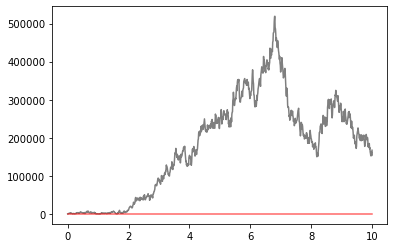

In [28]:
# Time vector
time = np.linspace(0,T,N)

# Plot squared distance r^2 = x^2 + y^2
plt.plot(time, rsq, alpha=0.5, color='k')

# Plot diffusivity
plt.plot(time, 4*D*t, alpha=0.6, color='r')

plt.show()

## Brownian Bridge

In [23]:
n = 1000
t = np.linspace(0,1,n)
x = np.random.normal(loc=0, scale=np.sqrt(1/n), size=(n,))
y = np.cumsum(x)
z = y - t*y[-1]

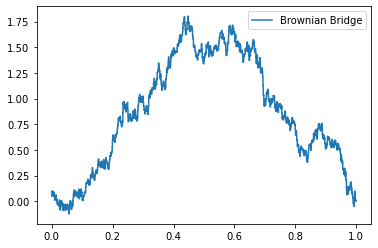

In [24]:
x = np.random.normal(loc=0, scale=np.sqrt(1/n), size=(n,))
y = np.cumsum(x)
z = y - t*y[-1]

plt.plot(t,z, drawstyle='steps', label='Brownian Bridge')
plt.legend()
plt.show()

In [25]:
def brownian_bridge(n):
    stdev = np.sqrt(1/n)
    x = np.random.normal(loc=0, scale=stdev, size=(n,))
    y = np.cumsum(x)
    z = y - t*y[-1]
    return z

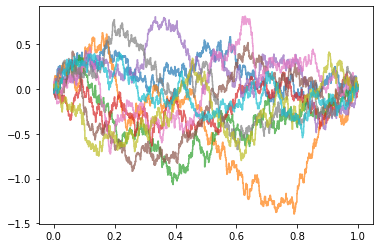

In [26]:
for i in range(10):
    plt.plot(t,brownian_bridge(n), drawstyle='steps', alpha=0.7)
plt.show()